In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 600,
})

import numpy as np
import torch

rng = np.random.default_rng()

# Convert data

## Loading data from Apr 5, 2023

Block 3


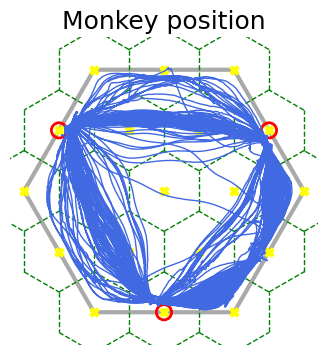

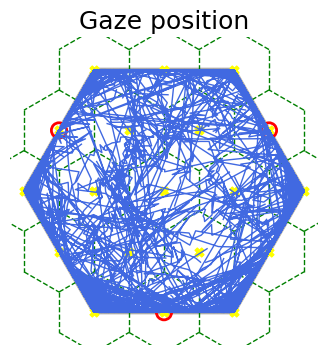

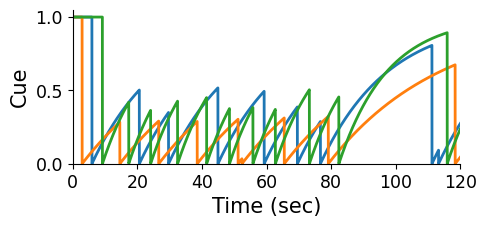

In [2]:
from hexarena.env import ForagingEnv
from hexarena.utils import load_monkey_data

env = ForagingEnv(arena={'resol': 2}, boxes=[{'num_patches': 1}]*3, dt=1)

filename = 'store/monkey-data_040523/testSession2.mat'
block_idx = rng.choice(7)
print('Block {}'.format(block_idx+1))
block_data = load_monkey_data(filename, block_idx)

_, ax = plt.subplots(figsize=(4, 4))
env.arena.plot_map(ax)
pos_xyz = block_data['pos_xyz']/1860.5
ax.plot(pos_xyz[:, 0], pos_xyz[:, 1], color='royalblue', linewidth=1)
ax.set_title('Monkey position')

_, ax = plt.subplots(figsize=(4, 4))
env.arena.plot_map(ax)
pos_xyz = block_data['gaze_xyz']/1860.5
ax.plot(pos_xyz[:, 0], pos_xyz[:, 1], color='royalblue', linewidth=1)
ax.set_title('Gaze position')

_, ax = plt.subplots(figsize=(5, 2))
ax.plot(block_data['t'], block_data['cues'])
ax.set_xlim([0, 120])
ax.set_xlabel('Time (sec)')
ax.set_ylim([0, None])
ax.set_ylabel('Cue')

plt.show()

In [3]:
from hexarena.utils import discretize_monkey_data, extract_observation_action

env_data = discretize_monkey_data(block_data, env)
observations, actions = extract_observation_action(env_data, env)
print('observations: {}'.format(observations.shape))
print('actions: {}'.format(actions.shape))

observations: (1206, 5)
actions: (1205,)


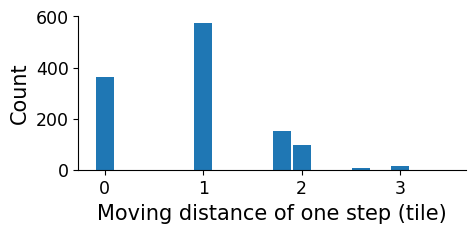

In [4]:
ds = []
for i in range(len(actions)):
    x1, y1 = env.arena.anchors[observations[i+1, 0]]
    x0, y0 = env.arena.anchors[observations[i, 0]]
    ds.append(((x1-x0)**2+(y1-y0)**2)**0.5)
ds = np.array(ds)*env.arena.resol

_, ax = plt.subplots(figsize=(5, 2))
ax.hist(ds, np.arange(-0.1, ds.max(), 0.2), rwidth=0.9)
ax.set_xlabel('Moving distance of one step (tile)')
ax.set_ylabel('Count')
plt.show()